In [110]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats as stats


In [111]:
# Task 1

gamma_top=1.33
m_top=173
interval=(170, 176)

In [112]:
def Cauchy(x, x_0, gamma):
    return 1/(np.pi*gamma)*gamma**2/((x-x_0)**2+gamma**2)

In [113]:
def Gauss(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

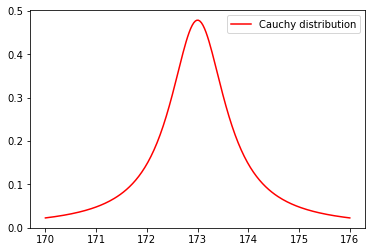

In [114]:
Interval=np.linspace(170, 176, 200)

plt.plot(Interval, Cauchy(Interval, m_top, gamma_top/2), c='r',label="Cauchy distribution")
plt.legend()

In [115]:
gen=np.random.default_rng()
n=2000

x=gen.uniform(*interval, n)
y=gen.uniform(0, 0.5, n)

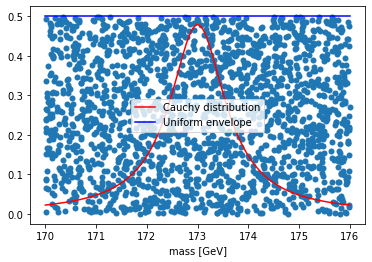

In [116]:
plt.plot(Interval, Cauchy(Interval, m_top, gamma_top/2), c='r',label="Cauchy distribution")
plt.scatter(x, y, lw=0.01)
plt.plot(Interval, np.full(200, 0.5), label="Uniform envelope", c='b')
plt.xlabel("mass [GeV]")
plt.legend()


In [117]:
ok = (y<Cauchy(x, m_top, gamma_top/2)) 
x_ok=x[ok]
y_ok=y[ok]
x_nok=x[np.invert(ok)]
y_nok=y[np.invert(ok)]

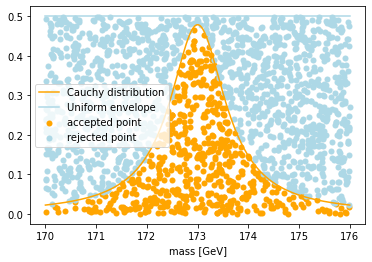

In [118]:
plt.plot(Interval, Cauchy(Interval, m_top, gamma_top/2), c='orange',label="Cauchy distribution")
plt.scatter(x_ok, y_ok, lw=0.01, c='orange', label='accepted point')
plt.scatter(x_nok, y_nok, lw=0.01, c='lightblue', label='rejected point')
plt.plot(Interval, np.full(200, 0.5), label="Uniform envelope", c='lightblue')
plt.xlabel("mass [GeV]")
plt.legend()

In [119]:
print("Acceptance rate: {}".format(len(x_ok) / len(x)))

Acceptance rate: 0.2795


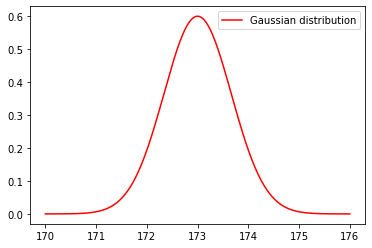

In [120]:
plt.plot(Interval, Gauss(Interval, m_top, gamma_top/2), c='r',label="Gaussian distribution")
plt.legend()

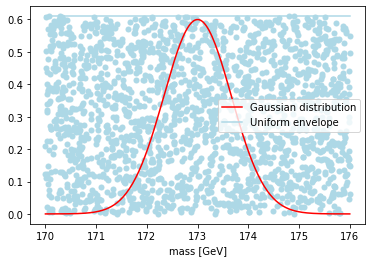

In [121]:
xg=gen.uniform(*interval, n)
yg=gen.uniform(0, 0.61, n)

plt.plot(Interval, Gauss(Interval, m_top, gamma_top/2), c='r',label="Gaussian distribution")
plt.scatter(xg, yg, lw=0.01, c='lightblue')
plt.plot(Interval, np.full(200, 0.61), label="Uniform envelope", c='lightblue')
plt.xlabel("mass [GeV]")
plt.legend()

In [122]:
okg = (yg<Gauss(xg, m_top, gamma_top/2)) 
xg_ok=xg[okg]
yg_ok=yg[okg]
xg_nok=xg[np.invert(okg)]
yg_nok=yg[np.invert(okg)]

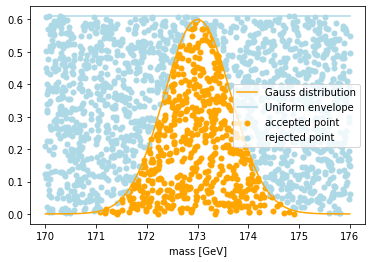

In [123]:
plt.plot(Interval, Gauss(Interval, m_top, gamma_top/2), c='orange',label="Gauss distribution")
plt.scatter(xg_ok, yg_ok, lw=0.01, c='orange', label='accepted point')
plt.scatter(xg_nok, yg_nok, lw=0.01, c='lightblue', label='rejected point')
plt.plot(Interval, np.full(200, 0.61), label="Uniform envelope", c='lightblue')
plt.xlabel("mass [GeV]")
plt.legend()

In [124]:
print("Acceptance rate: {}".format(len(xg_ok) / len(xg)))

Acceptance rate: 0.2785


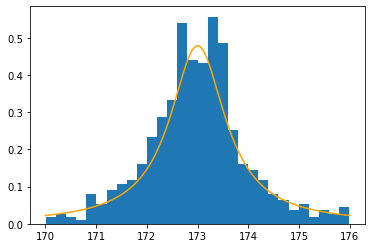

In [125]:
#Task 2

plt.hist(x_ok, bins=30, density=True)
plt.plot(Interval, Cauchy(Interval, m_top, gamma_top/2), c='orange',label="Cauchy distribution")
